In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [44]:
#load the data
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [45]:
#Processing in the data to fix it


categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

#copy
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

df['chol'].fillna(df['chol'].median(), inplace=True)

df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mode()[0], inplace=True)


df['thalch'].fillna(df['thalch'].median(), inplace=True)

categorical_columns = df.select_dtypes(include=['int', 'float']).columns
print(categorical_columns)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


In [46]:
#unpalanced classes
value_counts = df['num'].value_counts()

value_counts

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

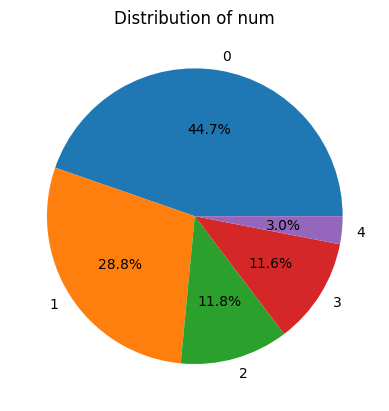

In [47]:
import matplotlib.pyplot as plt

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of num')

plt.show()

In [48]:
#Make the classes palanced

from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('num', axis=1)  

class_column = df['num']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)


df_balanced = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

class_distribution = df_balanced['num'].value_counts()
print(class_distribution)

num
0    411
2    411
1    411
3    411
4    411
Name: count, dtype: int64


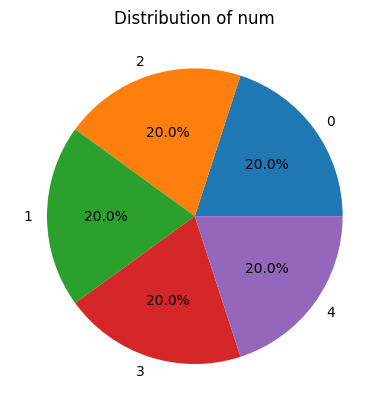

In [49]:
value_counts = df_balanced['num'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of num')

plt.show()

In [50]:
#drop unwanted columns

df_balanced.drop(columns=['id','dataset'],inplace=True)

In [51]:
df_balanced

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,65,Male,asymptomatic,136.0,248.0,False,normal,140.0,True,4.0,downsloping,0.0,normal,4
2051,60,Male,asymptomatic,130.0,206.0,False,lv hypertrophy,132.0,True,2.4,flat,2.0,reversable defect,4
2052,65,Male,asymptomatic,136.0,248.0,False,normal,140.0,True,4.0,downsloping,0.0,normal,4
2053,64,Male,asymptomatic,134.0,273.0,False,normal,102.0,True,4.0,downsloping,0.0,normal,4


In [52]:
X = df_balanced.iloc[:, 0:13].copy()
X 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,65,Male,asymptomatic,136.0,248.0,False,normal,140.0,True,4.0,downsloping,0.0,normal
2051,60,Male,asymptomatic,130.0,206.0,False,lv hypertrophy,132.0,True,2.4,flat,2.0,reversable defect
2052,65,Male,asymptomatic,136.0,248.0,False,normal,140.0,True,4.0,downsloping,0.0,normal
2053,64,Male,asymptomatic,134.0,273.0,False,normal,102.0,True,4.0,downsloping,0.0,normal


In [53]:
#convert y to 5 columns one in the target class and zero in the rest

from tensorflow.keras.utils import to_categorical

y = df_balanced.iloc[:, 13].values
y = to_categorical(y, num_classes=5)
print(y)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [54]:
label_encoder = LabelEncoder()

# Label encode :the order in this column is important
X['cp'] = label_encoder.fit_transform(X['cp'])
X['slope'] = label_encoder.fit_transform(X['slope'])
X['restecg'] = label_encoder.fit_transform(X['restecg'])


In [55]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,fixed defect
1,67,Male,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,normal
2,67,Male,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,reversable defect
3,37,Male,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,normal
4,41,Female,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,65,Male,0,136.0,248.0,False,1,140.0,True,4.0,0,0.0,normal
2051,60,Male,0,130.0,206.0,False,0,132.0,True,2.4,1,2.0,reversable defect
2052,65,Male,0,136.0,248.0,False,1,140.0,True,4.0,0,0.0,normal
2053,64,Male,0,134.0,273.0,False,1,102.0,True,4.0,0,0.0,normal


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#[sex ,fbs ,exang,thal]the order in this columns is not important
# Define and fit the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 5, 8, 12])], remainder='passthrough')

# Fit the ColumnTransformer
X = ct.fit_transform(X)



In [58]:
X[0]

array([  0. ,   1. ,   0. ,   1. ,   1. ,   0. ,   1. ,   0. ,   0. ,
        63. ,   3. , 145. , 233. ,   0. , 150. ,   2.3,   0. ,   0. ])

In [59]:
#split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [60]:
#Applay standerscaler in train and test in x values to make all the values in one range

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [61]:
print(X_train)

[[-0.4102552   0.4102552   0.47840111 ... -0.94451962 -0.07431023
  -0.46125566]
 [-0.4102552   0.4102552   0.47840111 ...  0.22150105  1.74334156
  -0.46125566]
 [-0.4102552   0.4102552  -2.09029615 ...  0.29923576 -1.89196202
  -0.46125566]
 ...
 [-0.4102552   0.4102552   0.47840111 ... -0.94451962 -0.07431023
  -0.46125566]
 [-0.4102552   0.4102552  -2.09029615 ... -0.94451962 -0.07431023
  -0.46125566]
 [-0.4102552   0.4102552   0.47840111 ... -0.94451962 -0.07431023
  -0.46125566]]


In [62]:
X_train[0]

array([-0.4102552 ,  0.4102552 ,  0.47840111, -0.47840111,  0.93160012,
       -0.93160012, -0.27452935,  0.76297806, -0.65131745,  0.77013735,
       -0.61619004,  0.79520638,  0.3457372 ,  0.03441418, -0.67158127,
       -0.94451962, -0.07431023, -0.46125566])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [64]:
#Built our Deep Neural Network
model = Sequential()

# Input layer (Dense with ReLU activation)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers with Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (5 units for 5 classes, with softmax activation)
model.add(Dense(5, activation='softmax'))

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1216      
                                                                 
 dense_6 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [67]:
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
49/49 [==============================] - 2s 8ms/step - loss: 1.5880 - accuracy: 0.2680 - val_loss: 1.4918 - val_accuracy: 0.3911
Epoch 2/80
49/49 [==============================] - 0s 5ms/step - loss: 1.4848 - accuracy: 0.3355 - val_loss: 1.3696 - val_accuracy: 0.4241
Epoch 3/80
49/49 [==============================] - 0s 5ms/step - loss: 1.3951 - accuracy: 0.3835 - val_loss: 1.3100 - val_accuracy: 0.4358
Epoch 4/80
49/49 [==============================] - 0s 5ms/step - loss: 1.3271 - accuracy: 0.4250 - val_loss: 1.2504 - val_accuracy: 0.4728
Epoch 5/80
49/49 [==============================] - 0s 5ms/step - loss: 1.2988 - accuracy: 0.4497 - val_loss: 1.2029 - val_accuracy: 0.5058
Epoch 6/80
49/49 [==============================] - 0s 6ms/step - loss: 1.2356 - accuracy: 0.4737 - val_loss: 1.1454 - val_accuracy: 0.5195
Epoch 7/80
49/49 [==============================] - 0s 5ms/step - loss: 1.2031 - accuracy: 0.4997 - val_loss: 1.0890 - val_accuracy: 0.5525
Epoch 8/80
49/49 [==

In [68]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


17/17 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.8774
Test Accuracy: 0.8774


In [69]:
print(y_test)

print(y_test.argmax(axis=-1))

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
[0 4 3 2 3 3 4 3 4 0 4 3 1 3 1 2 4 1 2 1 4 4 1 4 1 3 0 4 0 0 0 0 1 1 1 4 2
 3 3 3 0 1 2 3 1 1 0 3 4 4 1 2 0 3 1 3 1 1 1 3 0 1 0 1 2 4 0 3 0 0 4 2 0 2
 0 0 1 0 1 3 0 2 1 2 1 1 1 3 4 0 4 4 3 0 0 4 0 1 1 3 3 4 3 3 4 2 0 3 4 0 4
 3 2 3 1 0 2 2 4 2 0 4 1 2 3 4 1 2 0 4 1 2 3 2 0 2 1 2 0 2 1 3 2 0 1 3 0 0
 4 2 2 1 0 3 4 0 2 0 3 0 0 4 3 2 2 4 3 2 1 1 3 0 1 3 3 2 2 4 1 4 3 1 3 1 4
 2 1 3 0 0 2 1 3 0 1 4 1 1 0 3 2 0 3 3 0 1 4 0 0 0 0 0 1 4 2 3 3 4 3 2 4 3
 3 1 4 4 4 4 1 4 1 2 0 3 0 0 2 3 1 3 4 1 4 4 0 3 4 2 1 3 2 2 4 2 3 0 1 2 4
 0 0 1 2 0 1 2 1 1 3 2 0 1 4 1 0 4 4 3 4 1 4 0 4 0 4 2 2 3 1 3 4 1 1 0 1 1
 0 0 2 4 1 0 3 0 2 1 2 4 2 1 2 4 1 2 1 0 3 3 2 2 2 3 4 4 2 3 2 4 0 1 1 0 1
 2 1 1 4 4 0 1 0 4 1 4 4 3 3 1 3 1 1 1 1 4 0 2 4 0 4 0 2 1 1 1 1 2 0 3 3 4
 4 1 4 3 0 0 0 4 2 3 2 1 2 0 3 4 1 1 0 3 1 1 0 3 0 2 4 4 2 3 3 2 0 3 3 1 4
 2 2 1 1 4 2 0 2 4 3 2 1 3 2 1 0 0 2 2 4 0 3 0 3 3 3 4 0 1 0 

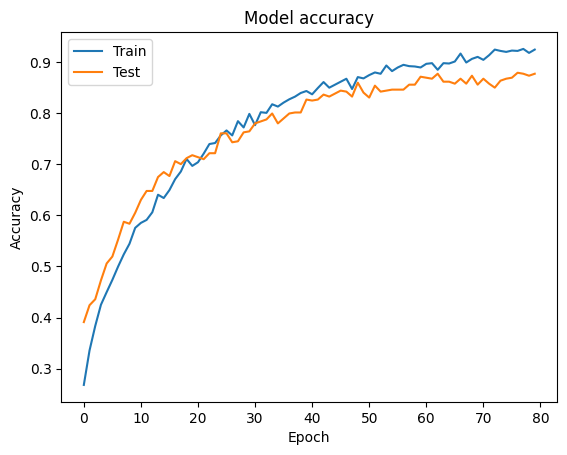

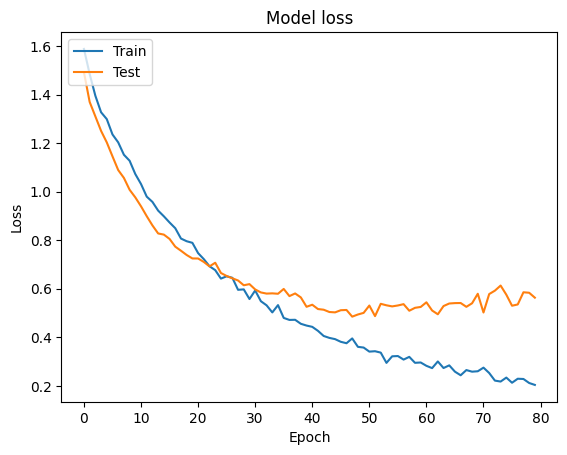

In [70]:
#Plot accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


17/17 [==============================] - 0s 2ms/step


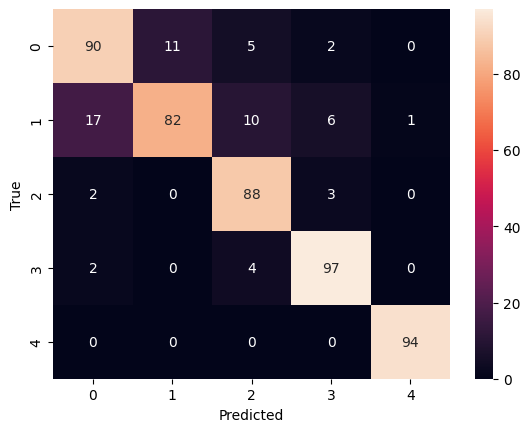

In [71]:
#confusion_matrix between true and predicted values in test data

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [72]:
#calculate  precision_score and recall_score

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')



Precision: 0.8791
Recall: 0.8774


In [73]:
#save the model
model.save("heart_disease_model.keras")

In [74]:
#save the lable encoder
from joblib import dump

dump(label_encoder, "heart_disease_encoder.pkl")

['heart_disease_encoder.pkl']

In [75]:
#save the one hot encoder

from joblib import dump


dump(ct, 'heart_disease_OneHotEncoder.pkl')

['heart_disease_OneHotEncoder.pkl']

In [76]:
#save stander scaler
from joblib import dump

dump(sc, "heart_disease_standard_scaler.pkl")

['heart_disease_standard_scaler.pkl']

In [86]:
#example use

import numpy as np

new_patient = np.array([[65, 'Male','asymptomatic', 130, 256, 'True', 0, 142, 'True', 0.6, 1, 1, 'fixed defect']], dtype=object)

In [96]:


from joblib import load

labelencoder_loaded=load("heart_disease_encoder.pkl")

new_patient[:,2] = labelencoder_loaded.fit_transform(new_patient[:,2])
new_patient[:,6] = labelencoder_loaded.fit_transform(new_patient[:,6])

new_patient[:,2] = labelencoder_loaded.fit_transform(new_patient[:,10])


In [88]:
new_patient

array([[65, 'Male', 0, 130, 256, 'True', 0, 142, 'True', 0.6, 0, 1,
        'fixed defect']], dtype=object)

In [89]:
new_patient[0, 1] = str(new_patient[0, 1])  
new_patient[0, 5] = bool(new_patient[0, 5] == 'True') 
new_patient[0, 8] = bool(new_patient[0, 8] == 'True')  
new_patient[0, 12] = str(new_patient[0, 12])  
new_patient

array([[65, 'Male', 0, 130, 256, True, 0, 142, True, 0.6, 0, 1,
        'fixed defect']], dtype=object)

In [90]:
from joblib import load

ct_loaded = load("heart_disease_OneHotEncoder.pkl")

new_patient = ct_loaded.transform(new_patient)

c:\Users\Ziad\anaconda3\envs\all\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [91]:
new_patient

array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 65, 0, 130, 256, 0,
        142, 0.6, 0, 1]], dtype=object)

In [92]:
from joblib import load  # Correct import

# Load the StandardScaler
sc_loaded = load("heart_disease_standard_scaler.pkl")  # This correctly loads the scaler

# Assuming `new_patient` is a NumPy array or DataFrame that needs to be scaled
new_patient_scaled = sc_loaded.transform(new_patient)  # Apply the scaler to your data

# Print the scaled new patient data
print(new_patient_scaled)
new_patient_scaled=np.array(new_patient_scaled)

[[-0.4102552   0.4102552  -2.09029615  2.09029615 -1.07342193  1.07342193
   3.64259777 -1.31065367 -0.65131745  0.99298622 -0.61619004 -0.18555558
   0.6269466  -1.39889002  0.42000721 -0.47811135 -1.89196202  0.7175088 ]]


In [93]:
from keras.models import load_model

loaded_model = load_model("heart_disease_model.keras")
new_prediction_proba = loaded_model.predict(new_patient_scaled)
predicted_category = np.argmax(new_prediction_proba, axis=1)

print("Prediction probabilities:", new_prediction_proba)
print("Predicted category:", predicted_category)

1/1 [==============================] - 0s 97ms/step
Prediction probabilities: [[5.9006574e-08 1.6167563e-05 9.9996710e-01 1.6756416e-05 3.9005238e-10]]
Predicted category: [2]
